In [1]:
import pandas as pd

# Load the feature-engineered dataset
df = pd.read_csv(r"C:\Users\user\Desktop\NVIDIA Stock predictive analysis\feature_engineered_nvda_data.csv")

# Check the first few rows
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,7_day_MA,30_day_MA,Daily_Return,Volatility,RSI,EMA_7,EMA_30,Middle_Band,Upper_Band,Lower_Band
0,1999-04-05,0.042188,0.043229,0.041146,0.041406,0.037979,98640000,0.042559,0.043694,-0.030486,0.043223,43.208647,0.042386,0.043161,0.042936,0.046498,0.039375
1,1999-04-06,0.041797,0.041927,0.039583,0.040365,0.037024,69696000,0.042597,0.043581,-0.025141,0.043429,44.024732,0.041881,0.042980,0.042728,0.046383,0.039073
2,1999-04-07,0.040625,0.044010,0.040365,0.043750,0.040129,89280000,0.042615,0.043511,0.083860,0.045314,51.366097,0.042348,0.043030,0.042617,0.045982,0.039252
3,1999-04-08,0.044010,0.045833,0.043490,0.044531,0.040845,130128000,0.042559,0.043346,0.017851,0.042888,51.891062,0.042894,0.043127,0.042585,0.045856,0.039313
4,1999-04-09,0.044792,0.044792,0.043490,0.043750,0.040129,48624000,0.042931,0.043207,-0.017538,0.042637,50.000000,0.043108,0.043167,0.042611,0.045912,0.039309


In [4]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv(r"C:\Users\user\Desktop\NVIDIA Stock predictive analysis\feature_engineered_nvda_data.csv")


# Sort data by date to ensure proper shifting
df = df.sort_values(by="Date")

# Regression Target: Predicting next day's closing price
df["Next_Close"] = df["Close"].shift(-1)

# Classification Target: Predicting if stock goes up or down
df["Direction"] = (df["Next_Close"] > df["Close"]).astype(int)

# Drop last row since it has NaN in 'Next_Close' and 'Direction'
df = df.dropna()

# Display first few rows
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,7_day_MA,30_day_MA,Daily_Return,Volatility,RSI,EMA_7,EMA_30,Middle_Band,Upper_Band,Lower_Band,Next_Close,Direction
0,1999-04-05,0.042188,0.043229,0.041146,0.041406,0.037979,98640000,0.042559,0.043694,-0.030486,0.043223,43.208647,0.042386,0.043161,0.042936,0.046498,0.039375,0.040365,0
1,1999-04-06,0.041797,0.041927,0.039583,0.040365,0.037024,69696000,0.042597,0.043581,-0.025141,0.043429,44.024732,0.041881,0.042980,0.042728,0.046383,0.039073,0.043750,1
2,1999-04-07,0.040625,0.044010,0.040365,0.043750,0.040129,89280000,0.042615,0.043511,0.083860,0.045314,51.366097,0.042348,0.043030,0.042617,0.045982,0.039252,0.044531,1
3,1999-04-08,0.044010,0.045833,0.043490,0.044531,0.040845,130128000,0.042559,0.043346,0.017851,0.042888,51.891062,0.042894,0.043127,0.042585,0.045856,0.039313,0.043750,0
4,1999-04-09,0.044792,0.044792,0.043490,0.043750,0.040129,48624000,0.042931,0.043207,-0.017538,0.042637,50.000000,0.043108,0.043167,0.042611,0.045912,0.039309,0.041927,0


In [5]:
# Select features for modeling
features = [
    "Open", "High", "Low", "Close", "Volume",
    "7_day_MA", "30_day_MA", "Daily_Return", "Volatility",
    "RSI", "EMA_7", "EMA_30",
    "Middle_Band", "Upper_Band", "Lower_Band"
]

X = df[features]
y_reg = df["Next_Close"]  # Target for regression
y_clf = df["Direction"]   # Target for classification

# Check feature dataset
X.head()

,Open,High,Low,Close,Volume,7_day_MA,30_day_MA,Daily_Return,Volatility,RSI,EMA_7,EMA_30,Middle_Band,Upper_Band,Lower_Band
0,0.042188,0.043229,0.041146,0.041406,98640000,0.042559,0.043694,-0.030486,0.043223,43.208647,0.042386,0.043161,0.042936,0.046498,0.039375
1,0.041797,0.041927,0.039583,0.040365,69696000,0.042597,0.043581,-0.025141,0.043429,44.024732,0.041881,0.042980,0.042728,0.046383,0.039073
2,0.040625,0.044010,0.040365,0.043750,89280000,0.042615,0.043511,0.083860,0.045314,51.366097,0.042348,0.043030,0.042617,0.045982,0.039252
3,0.044010,0.045833,0.043490,0.044531,130128000,0.042559,0.043346,0.017851,0.042888,51.891062,0.042894,0.043127,0.042585,0.045856,0.039313
4,0.044792,0.044792,0.043490,0.043750,48624000,0.042931,0.043207,-0.017538,0.042637,50.000000,0.043108,0.043167,0.042611,0.045912,0.039309


In [6]:
from sklearn.model_selection import train_test_split

# Splitting data (80% train, 20% test)
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)


In [9]:
print("X Shape:", X.shape)
print("y_reg Shape:", y_reg.shape)
print("y_clf Shape:", y_clf.shape)


X Shape: (6343, 15)
y_reg Shape: (6343,)
y_clf Shape: (6343,)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train model
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Predictions
y_pred_clf = clf_model.predict(X_test_clf)

# Evaluation
print("Classification Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print(classification_report(y_test_clf, y_pred_clf))


Classification Accuracy: 0.5066981875492513
              precision    recall  f1-score   support

           0       0.48      0.53      0.51       600
           1       0.54      0.48      0.51       669

    accuracy                           0.51      1269
   macro avg       0.51      0.51      0.51      1269
weighted avg       0.51      0.51      0.51      1269



In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize and train model
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train, y_train_reg)

# Predictions
y_pred_reg = reg_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)

print("Regression Model Performance:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)


Regression Model Performance:
Mean Absolute Error: 0.13354017434988205
Mean Squared Error: 0.273322667403827


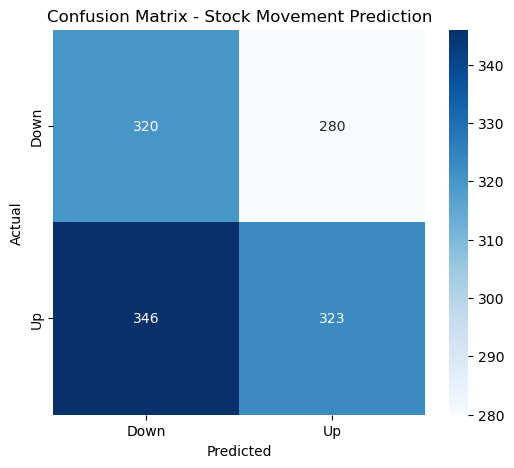

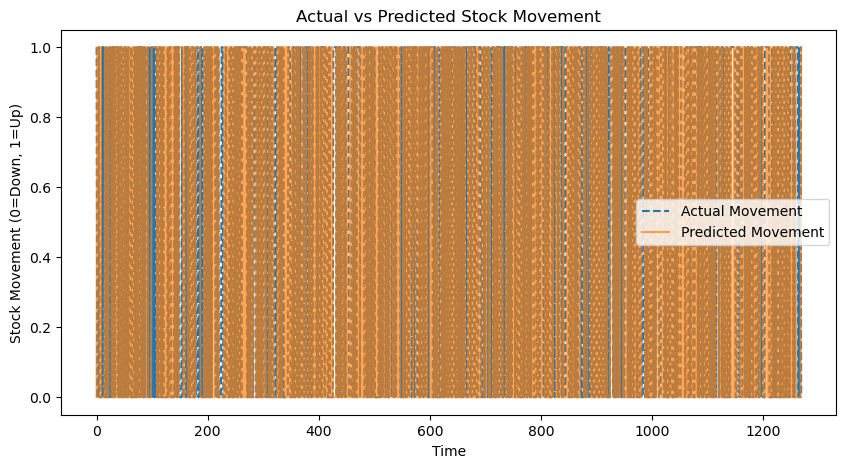

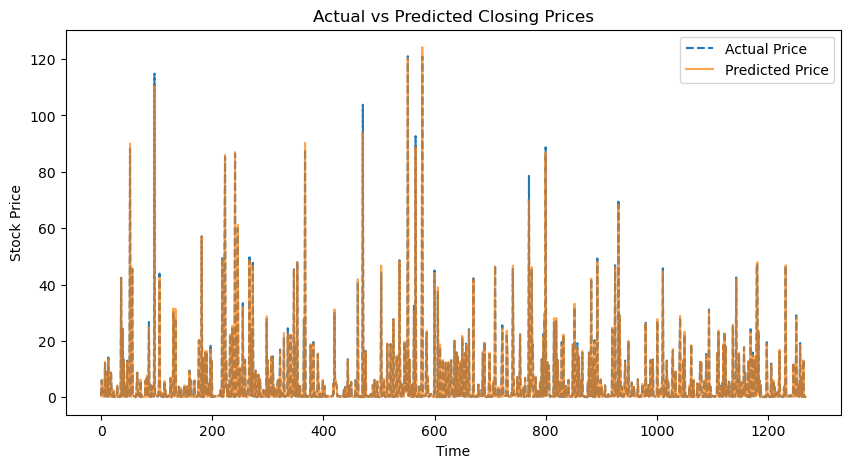

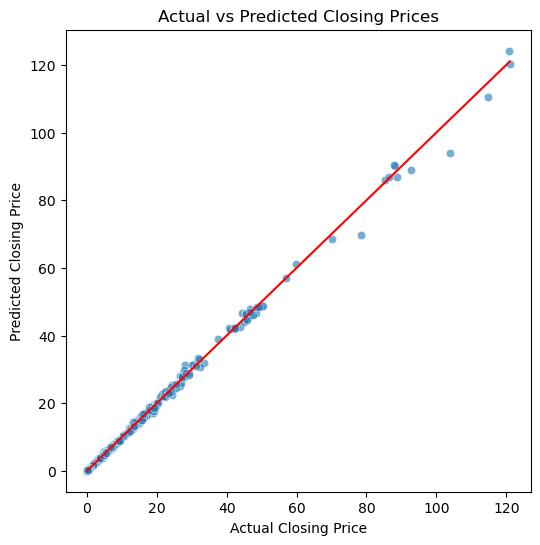

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# CLASSIFICATION: Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test_clf, y_pred_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Stock Movement Prediction')
plt.show()

# CLASSIFICATION: Actual vs Predicted Movement (Line Plot)
plt.figure(figsize=(10, 5))
plt.plot(y_test_clf.values, label='Actual Movement', linestyle='dashed')
plt.plot(y_pred_clf, label='Predicted Movement', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Stock Movement')
plt.xlabel('Time')
plt.ylabel('Stock Movement (0=Down, 1=Up)')
plt.show()

# REGRESSION: Actual vs Predicted Closing Prices (Line Plot)
plt.figure(figsize=(10, 5))
plt.plot(y_test_reg.values, label='Actual Price', linestyle='dashed')
plt.plot(y_pred_reg, label='Predicted Price', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

# REGRESSION: Scatter Plot (Actual vs Predicted)
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.6)
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red')  # Diagonal line
plt.show()


In [12]:
import joblib
import pandas as pd
import os

# Define folder path (change this to your actual project folder path)
folder_path = r"C:\Users\user\Desktop\NVIDIA Stock predictive analysis"

# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Save models
joblib.dump(reg_model, os.path.join(folder_path, "nvda_regression_model.pkl"))
joblib.dump(clf_model, os.path.join(folder_path, "nvda_classification_model.pkl"))

# Save predictions
predictions_df = pd.DataFrame({
    'Actual_Close': y_test_reg.values,
    'Predicted_Close': y_pred_reg,
    'Actual_Movement': y_test_clf.values,
    'Predicted_Movement': y_pred_clf
})
predictions_df.to_csv(os.path.join(folder_path, "nvda_predictions.csv"), index=False)

print("Models and predictions saved successfully in:", folder_path)


Models and predictions saved successfully in: C:\Users\user\Desktop\NVIDIA Stock predictive analysis
